In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import pickle
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [2]:
df =pd.read_csv("HeartDisease.csv")
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,15.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,30.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,11.0,5.0,4.0


In [3]:
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
BMI                     0
Smoker                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
MentHlth                0
PhysHlth                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [4]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,28.382364,0.443169,0.296921,0.756544,0.634256,0.811420,0.056197,3.184772,4.242081,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,6.608694,0.496761,0.698160,0.429169,0.481639,0.391175,0.230302,7.412847,8.717951,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,31.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,3.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,13.000000,6.000000,8.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   BMI                   253680 non-null  float64
 4   Smoker                253680 non-null  float64
 5   Diabetes              253680 non-null  float64
 6   PhysActivity          253680 non-null  float64
 7   Fruits                253680 non-null  float64
 8   Veggies               253680 non-null  float64
 9   HvyAlcoholConsump     253680 non-null  float64
 10  MentHlth              253680 non-null  float64
 11  PhysHlth              253680 non-null  float64
 12  Sex                   253680 non-null  float64
 13  Age                   253680 non-null  float64
 14  Education             253680 non-null  float64
 15  

In [6]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'BMI', 'Smoker',
       'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'MentHlth', 'PhysHlth', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

In [7]:
df.corr()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
HeartDiseaseorAttack,1.000000,0.209361,0.180765,0.052904,0.114441,0.180272,-0.087299,-0.019790,-0.039167,-0.028991,0.064621,0.181698,0.086096,0.221618,-0.099600,-0.141011
HighBP,0.209361,1.000000,0.298199,0.213748,0.096991,0.271596,-0.125267,-0.040555,-0.061266,-0.003972,0.056456,0.161212,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.180765,0.298199,1.000000,0.106722,0.091299,0.209085,-0.078046,-0.040859,-0.039874,-0.011543,0.062069,0.121751,0.031205,0.272318,-0.070802,-0.085459
BMI,0.052904,0.213748,0.106722,1.000000,0.013804,0.224379,-0.147294,-0.087518,-0.062275,-0.048736,0.085310,0.121141,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.114441,0.096991,0.091299,0.013804,1.000000,0.062914,-0.087401,-0.077666,-0.030678,0.101619,0.092196,0.116460,0.093662,0.120641,-0.161955,-0.123937
Diabetes,0.180272,0.271596,0.209085,0.224379,0.062914,1.000000,-0.121947,-0.042192,-0.058972,-0.057882,0.073507,0.176287,0.031040,0.185026,-0.130517,-0.171483
PhysActivity,-0.087299,-0.125267,-0.078046,-0.147294,-0.087401,-0.121947,1.000000,0.142756,0.153150,0.012392,-0.125587,-0.219230,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.019790,-0.040555,-0.040859,-0.087518,-0.077666,-0.042192,0.142756,1.000000,0.254342,-0.035288,-0.068217,-0.044633,-0.091175,0.064547,0.110187,0.079929
Veggies,-0.039167,-0.061266,-0.039874,-0.062275,-0.030678,-0.058972,0.153150,0.254342,1.000000,0.021064,-0.058884,-0.064290,-0.064765,-0.009771,0.154329,0.151087
HvyAlcoholConsump,-0.028991,-0.003972,-0.011543,-0.048736,0.101619,-0.057882,0.012392,-0.035288,0.021064,1.000000,0.024716,-0.026415,0.005740,-0.034578,0.023997,0.053619


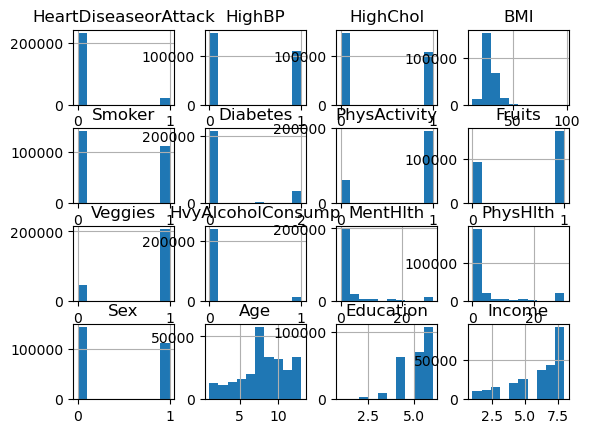

In [8]:
df.hist()
plt.show()

<Axes: xlabel='HeartDiseaseorAttack', ylabel='count'>

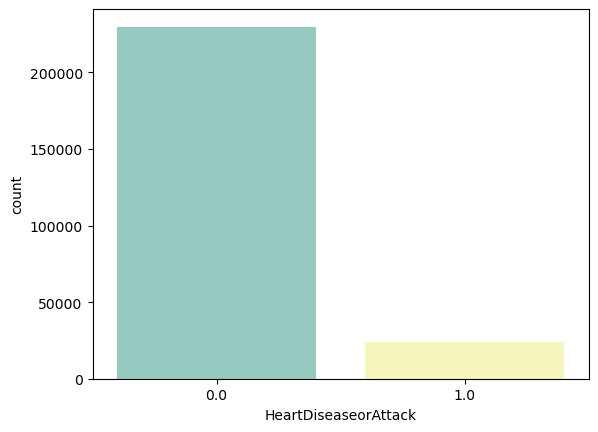

In [9]:
sns.countplot(x ="HeartDiseaseorAttack",data=df,palette="Set3")

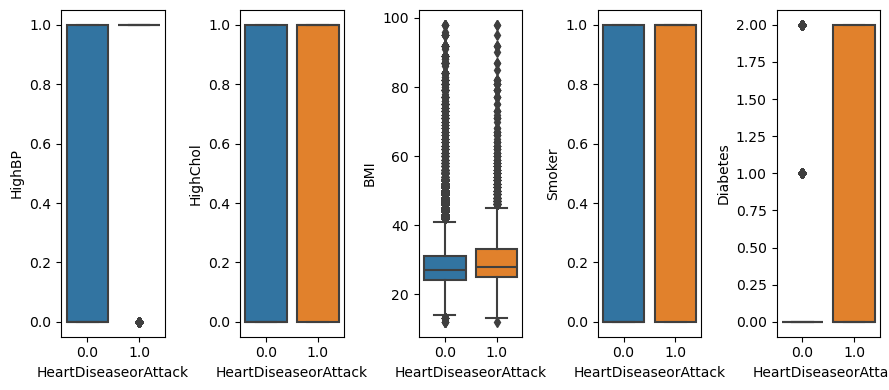

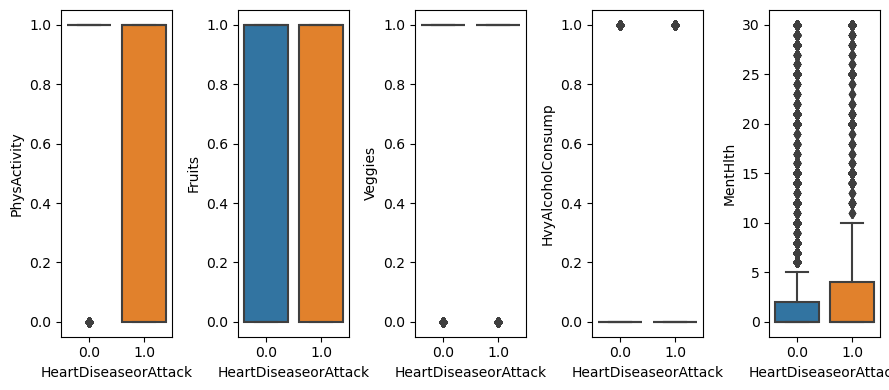

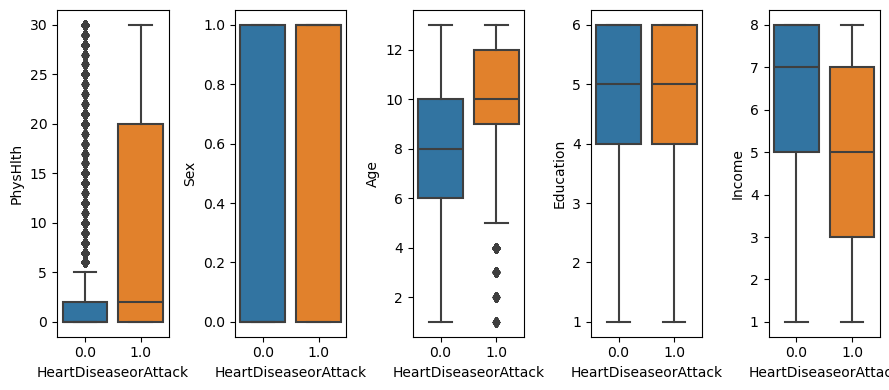

In [10]:
#sns.set(font_scale=1.4)
plt.rcParams["figure.figsize"] = (9, 4)
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)

sns.boxplot(x="HeartDiseaseorAttack", y='HighBP', data=df, ax= ax1)
sns.boxplot(x="HeartDiseaseorAttack", y='HighChol', data=df, ax= ax2)
sns.boxplot(x="HeartDiseaseorAttack", y='BMI', data=df, ax= ax3)
sns.boxplot(x="HeartDiseaseorAttack", y='Smoker', data=df, ax= ax4)
sns.boxplot(x="HeartDiseaseorAttack", y='Diabetes', data=df, ax= ax5)
plt.tight_layout()

f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)

sns.boxplot(x="HeartDiseaseorAttack", y='PhysActivity', data=df, ax= ax1)
sns.boxplot(x="HeartDiseaseorAttack", y='Fruits', data=df, ax= ax2)
sns.boxplot(x="HeartDiseaseorAttack", y='Veggies', data=df, ax= ax3)
sns.boxplot(x="HeartDiseaseorAttack", y='HvyAlcoholConsump', data=df, ax= ax4)
sns.boxplot(x="HeartDiseaseorAttack", y='MentHlth', data=df, ax= ax5)
plt.tight_layout()

f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)

sns.boxplot(x="HeartDiseaseorAttack", y='PhysHlth', data=df, ax= ax1)
sns.boxplot(x="HeartDiseaseorAttack", y='Sex', data=df, ax= ax2)
sns.boxplot(x="HeartDiseaseorAttack", y='Age', data=df, ax= ax3)
sns.boxplot(x="HeartDiseaseorAttack", y='Education', data=df, ax= ax4)
sns.boxplot(x="HeartDiseaseorAttack", y='Income', data=df, ax= ax5)
plt.tight_layout()


In [11]:
x =df[['HighBP', 'HighChol', 'BMI', 'Smoker',
       'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'MentHlth', 'PhysHlth', 'Sex', 'Age', 'Education', 'Income']]
y =df["HeartDiseaseorAttack"]

In [12]:
x

,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,15.0,0.0,9.0,4.0,3.0
1,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,30.0,0.0,9.0,4.0,8.0
3,1.0,0.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,45.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,18.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,28.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,1.0,0.0,23.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [13]:
x.columns

Index(['HighBP', 'HighChol', 'BMI', 'Smoker', 'Diabetes', 'PhysActivity',
       'Fruits', 'Veggies', 'HvyAlcoholConsump', 'MentHlth', 'PhysHlth', 'Sex',
       'Age', 'Education', 'Income'],
      dtype='object')

In [14]:
scaler =StandardScaler()
x_scaled=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size =0.2,random_state=40)


In [16]:
lg_model =LogisticRegression()
lg_model.fit(x_train,y_train)



LogisticRegression()

In [17]:
y_pred =lg_model.predict(x_test)

print("accuracy score is : ",accuracy_score(y_test,y_pred))
print("classification_report is :\n",classification_report(y_test,y_pred))
print("confusion_matrix is :\n",confusion_matrix(y_test,y_pred))
coefficient =pd.DataFrame({"Feature":x_train.columns,"Coefficient":lg_model.coef_[0]})
print(coefficient)

accuracy score is :  0.9052152317880795
classification_report is :
               precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     45969
         1.0       0.47      0.06      0.11      4767

    accuracy                           0.91     50736
   macro avg       0.69      0.53      0.53     50736
weighted avg       0.87      0.91      0.87     50736

confusion_matrix is :
 [[45639   330]
 [ 4479   288]]
              Feature  Coefficient
0              HighBP     0.335336
1            HighChol     0.331073
2                 BMI     0.041766
3              Smoker     0.205675
4            Diabetes     0.164060
5        PhysActivity    -0.036849
6              Fruits    -0.002599
7             Veggies     0.003509
8   HvyAlcoholConsump    -0.078981
9            MentHlth     0.084079
10           PhysHlth     0.253686
11                Sex     0.376304
12                Age     0.803428
13          Education    -0.035794
14             Income    -

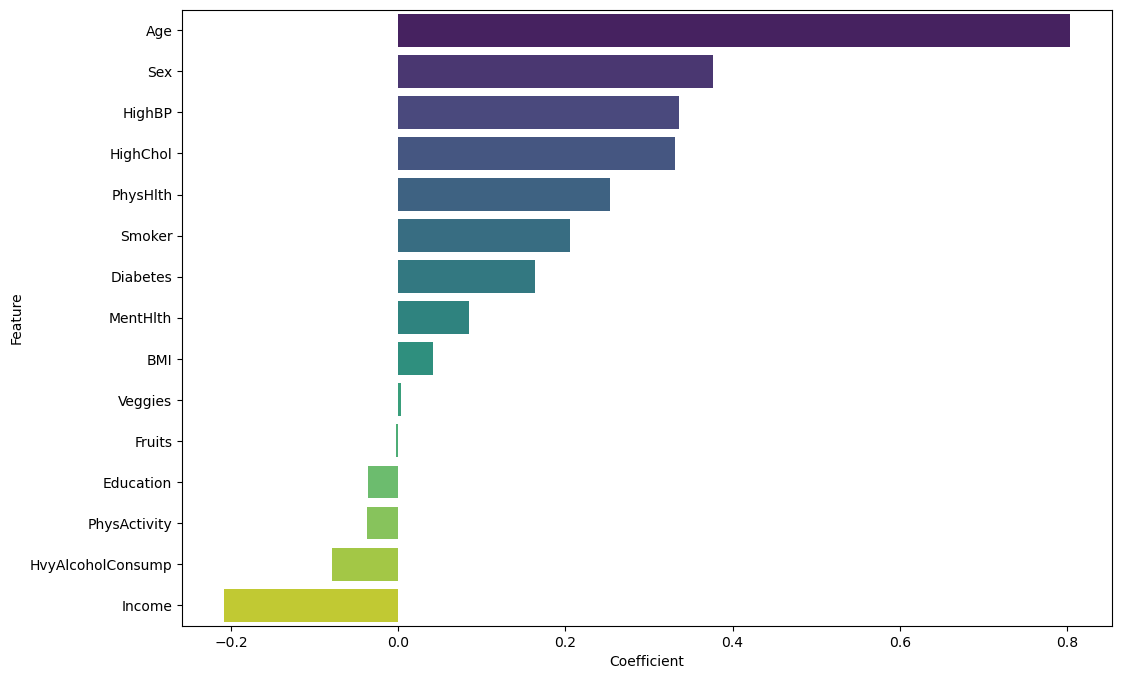

In [18]:
coef =coefficient.sort_values(by ="Coefficient",ascending =False)
plt.figure(figsize=(12,8))
sns.barplot(x="Coefficient",y ="Feature",data =coef,palette ="viridis")
plt.show()

In [19]:
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [20]:
y_pred =rf_model.predict(x_test)

print("accuracy score is :",accuracy_score(y_test,y_pred))
print("clasifiaction report is :\n",classification_report(y_test,y_pred))
print("confusion matrix is :\n",confusion_matrix(y_test,y_pred))
RF_coefficients =pd.DataFrame({"feature":x_train.columns,"coffiecient":rf_model.feature_importances_})
print(RF_coefficients)

accuracy score is : 0.8965231788079471
clasifiaction report is :
               precision    recall  f1-score   support

         0.0       0.91      0.98      0.95     45969
         1.0       0.31      0.08      0.13      4767

    accuracy                           0.90     50736
   macro avg       0.61      0.53      0.54     50736
weighted avg       0.85      0.90      0.87     50736

confusion matrix is :
 [[45107   862]
 [ 4388   379]]
              feature  coffiecient
0              HighBP     0.031807
1            HighChol     0.027299
2                 BMI     0.253533
3              Smoker     0.021069
4            Diabetes     0.030894
5        PhysActivity     0.026155
6              Fruits     0.034032
7             Veggies     0.028432
8   HvyAlcoholConsump     0.009972
9            MentHlth     0.079785
10           PhysHlth     0.109205
11                Sex     0.023431
12                Age     0.128762
13          Education     0.080602
14             Income     0.

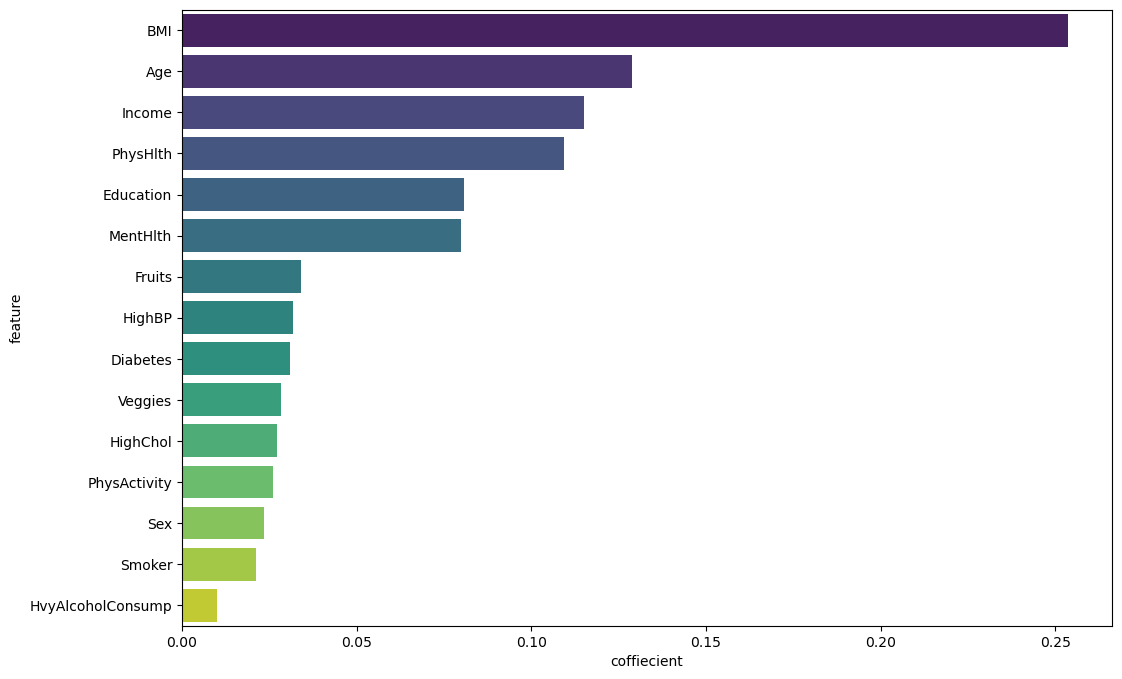

In [21]:
coef =RF_coefficients.sort_values(by ="coffiecient",ascending =False)
plt.figure(figsize=(12,8))
sns.barplot(x="coffiecient",y ="feature",data =coef,palette ="viridis")
plt.show()

In [22]:
xg_model =XGBClassifier(random_state =40)
xg_model.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=40, ...)

In [23]:
y_pred =xg_model.predict(x_test)

print("accuracy_score is :",accuracy_score(y_test,y_pred))
print("classification report is :\n",classification_report(y_test,y_pred))
print("confusion_matrix is :\n",confusion_matrix(y_test,y_pred))
XG_coefficients = pd.DataFrame({"Feature": x_train.columns, "Importance": xg_model.feature_importances_})
print(XG_coefficients)


accuracy_score is : 0.9051166824345632
classification report is :
               precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     45969
         1.0       0.46      0.05      0.10      4767

    accuracy                           0.91     50736
   macro avg       0.68      0.52      0.52     50736
weighted avg       0.87      0.91      0.87     50736

confusion_matrix is :
 [[45666   303]
 [ 4511   256]]
              Feature  Importance
0              HighBP    0.438653
1            HighChol    0.121349
2                 BMI    0.011220
3              Smoker    0.042603
4            Diabetes    0.042721
5        PhysActivity    0.015655
6              Fruits    0.011101
7             Veggies    0.011168
8   HvyAlcoholConsump    0.019777
9            MentHlth    0.014132
10           PhysHlth    0.052992
11                Sex    0.082310
12                Age    0.095327
13          Education    0.014757
14             Income    0.026238


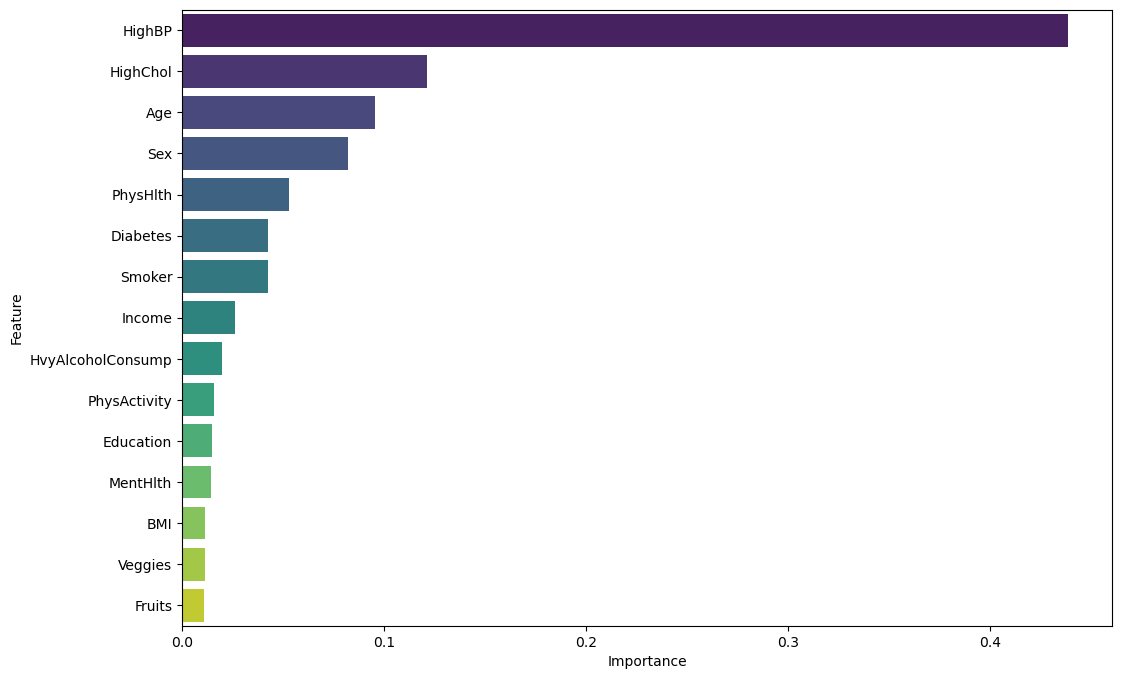

In [24]:
coef =XG_coefficients.sort_values(by ="Importance",ascending =False)
plt.figure(figsize=(12,8))
sns.barplot(x="Importance",y ="Feature",data =coef,palette ="viridis")
plt.show()

In [25]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)
knn_y_pred = knn_model.predict(x_test)

print("KNN Accuracy:", accuracy_score(y_test, knn_y_pred))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, knn_y_pred))
print("KNN Classification Report:\n", classification_report(y_test, knn_y_pred))


KNN Accuracy: 0.8941185745821507
KNN Confusion Matrix:
 [[44842  1127]
 [ 4245   522]]
KNN Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.98      0.94     45969
         1.0       0.32      0.11      0.16      4767

    accuracy                           0.89     50736
   macro avg       0.62      0.54      0.55     50736
weighted avg       0.86      0.89      0.87     50736



In [26]:
import shap
explainer = shap.Explainer(lg_model, x)
shap_values = explainer(x)

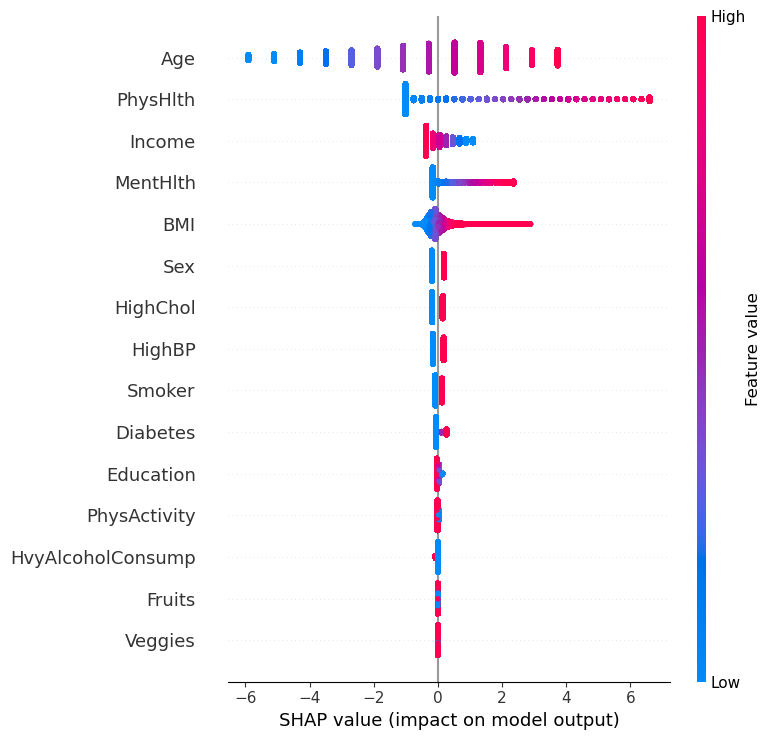

In [27]:
shap.summary_plot(shap_values, x)


In [28]:

def FitModel(x,y,algo_name,algorithm,gridSearchParams,cv):
    np.random.seed(10)
    y = y.values.ravel() 

    x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=20)
    grid =GridSearchCV(estimator =algorithm,param_grid =gridSearchParams,
                       cv =cv,scoring ="accuracy",verbose =1,n_jobs =-1)
    grid_result =grid.fit(x_train,y_train)
    best_params =grid_result.best_params_
    pred =grid_result.predict(x_test)
    cm =confusion_matrix(y_test,pred)

    print(pred)
    pickle.dump(grid_result,open(algo_name,"wb"))
    print("Best params :",best_params)
    print("classification_report :\n",classification_report(y_test,pred))
    print("Accuracy score",accuracy_score(y_test,pred))
    print("confusion matrix :\n",cm)

In [29]:

gridSearchParams = {
    'criterion': ['gini', 'entropy'],
    #'splitter': ['best', 'random'],
    #'max_depth': [None, 10, 20, 30],
    #'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
FitModel(x_scaled,y,"Dession_tree",DecisionTreeClassifier(),gridSearchParams,cv=5)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[0. 0. 0. ... 0. 0. 0.]
Best params : {'criterion': 'gini', 'min_samples_leaf': 4}
classification_report :
               precision    recall  f1-score   support

         0.0       0.92      0.96      0.94     46035
         1.0       0.28      0.15      0.20      4701

    accuracy                           0.88     50736
   macro avg       0.60      0.56      0.57     50736
weighted avg       0.86      0.88      0.87     50736

Accuracy score 0.8846381267738883
confusion matrix :
 [[44164  1871]
 [ 3982   719]]


In [30]:
Param = {
    #'penalty': ['elasticnet'],
    'C': [0.1, 1],
    'solver': ['newton-cg','liblinear','saga']
}


FitModel(x_scaled,y,"logistic_regression_1",LogisticRegression(),Param,cv=5)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[0. 0. 0. ... 0. 0. 0.]
Best params : {'C': 0.1, 'solver': 'newton-cg'}
classification_report :
               precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     46035
         1.0       0.49      0.07      0.12      4701

    accuracy                           0.91     50736
   macro avg       0.70      0.53      0.54     50736
weighted avg       0.87      0.91      0.87     50736

Accuracy score 0.9070876695048881
confusion matrix :
 [[45701   334]
 [ 4380   321]]


In [31]:
Param = [
    #{'solver': ['newton-cg', 'lbfgs', 'sag'],
     #'penalty': ['l2'],
     #'C': [0.01, 0.1, 1, 10, 100]},

    {'solver': ['liblinear'],
     'penalty': ['l1', 'l2'],
     'C': [0.01, 0.1, 1, 10, 100]},

    #{'solver': ['saga'],
     #'penalty': ['l1', 'l2', 'elasticnet', 'none'],
     #'C': [0.01, 0.1, 1, 10, 100],
     #'l1_ratio': [0, 0.5, 1]}
]

FitModel(x_scaled, y, "logistic_regression_2", LogisticRegression(max_iter=10000), Param, cv=5)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0. 0. 0. ... 0. 0. 0.]
Best params : {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
classification_report :
               precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     46035
         1.0       0.50      0.06      0.11      4701

    accuracy                           0.91     50736
   macro avg       0.70      0.53      0.53     50736
weighted avg       0.87      0.91      0.87     50736

Accuracy score 0.9072256385998108
confusion matrix :
 [[45731   304]
 [ 4403   298]]


In [32]:

with open('lg_model.pkl', 'wb') as file:
    pickle.dump(lg_model, file)

In [33]:
with open('logistic_regression_2', 'rb') as file:
    loaded_model = pickle.load(file)

In [34]:
pred = loaded_model.predict(x_test)
proba = loaded_model.predict_proba(x_test)

In [35]:
df_test =pd.DataFrame(data =x_test,columns=x.columns)
df_test.head()y

,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
246288,-0.866785,-0.858182,-0.209174,1.120927,-0.425292,0.567275,-1.316872,0.482087,-0.244014,-0.429630,-0.486592,1.127369,-1.647599,-1.065595,0.939638
50287,1.153688,1.165254,-0.965755,-0.892119,-0.425292,0.567275,0.759375,0.482087,-0.244014,-0.429630,-0.486592,1.127369,0.971733,0.963272,-0.508837
216726,1.153688,1.165254,0.396091,-0.892119,2.439387,-1.762814,-1.316872,0.482087,-0.244014,3.617407,-0.486592,1.127369,0.644317,-1.065595,0.456813
193456,1.153688,1.165254,0.850039,-0.892119,2.439387,-1.762814,-1.316872,-2.074316,-0.244014,-0.429630,-0.257180,-0.887021,1.626566,-3.094461,-0.991662
151348,1.153688,-0.858182,-1.571019,1.120927,2.439387,0.567275,-1.316872,-2.074316,-0.244014,-0.429630,-0.486592,1.127369,0.316900,0.963272,-1.474487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233511,1.153688,1.165254,-0.057858,1.120927,-0.425292,0.567275,0.759375,0.482087,4.098123,0.649580,-0.486592,-0.887021,0.316900,0.963272,0.456813
248159,-0.866785,-0.858182,-0.965755,1.120927,-0.425292,0.567275,0.759375,0.482087,4.098123,-0.294728,-0.486592,-0.887021,-0.665349,-0.051162,0.939638
27846,1.153688,-0.858182,-0.663122,1.120927,-0.425292,0.567275,-1.316872,0.482087,-0.244014,-0.429630,-0.486592,1.127369,-1.320182,-1.065595,0.456813
116379,-0.866785,1.165254,-0.663122,-0.892119,-0.425292,0.567275,0.759375,0.482087,-0.244014,-0.429630,-0.371886,1.127369,-0.010516,0.963272,0.939638


In [36]:
df_test["true"]=y_test
df_test["Predicted"]=pred
df_test["probability"]=proba[:,1]

In [37]:
df_test["true"].unique()

array([0., 1.])

In [38]:
df_test["Predicted"].unique()

array([0., 1.])

In [42]:
df_test.reset_index(drop=True,inplace=True)
df_test.head()

,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income,true,Predicted,probability
0,-0.866785,-0.858182,-0.209174,1.120927,-0.425292,0.567275,-1.316872,0.482087,-0.244014,-0.429630,-0.486592,1.127369,-1.647599,-1.065595,0.939638,0.0,0.0,0.010312
1,1.153688,1.165254,-0.965755,-0.892119,-0.425292,0.567275,0.759375,0.482087,-0.244014,-0.429630,-0.486592,1.127369,0.971733,0.963272,-0.508837,0.0,0.0,0.198929
2,1.153688,1.165254,0.396091,-0.892119,2.439387,-1.762814,-1.316872,0.482087,-0.244014,3.617407,-0.486592,1.127369,0.644317,-1.065595,0.456813,0.0,0.0,0.291904
3,1.153688,1.165254,0.850039,-0.892119,2.439387,-1.762814,-1.316872,-2.074316,-0.244014,-0.429630,-0.257180,-0.887021,1.626566,-3.094461,-0.991662,1.0,0.0,0.326141
4,1.153688,-0.858182,-1.571019,1.120927,2.439387,0.567275,-1.316872,-2.074316,-0.244014,-0.429630,-0.486592,1.127369,0.316900,0.963272,-1.474487,0.0,0.0,0.183592


**Out of all the models tested, the Logistic Regression_2 model stands out as the best performer, providing the highest accuracy compared to the other models.**